In [1]:
print('Hello')

Hello


## Занятие 2. Решение уравнения методом дихотомии

# Вариант 4

$$ S_2 + 4CO_2 =  2SO_2 + 4CO $$

$$
ln(K_p) = a + \frac{b}{T} + c*ln(T) + d*T + e * T^2 + g*T^3
$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Константы для 4 реакции
#Для температуры 300-6000 К
a = 19.2415
b = - 49257.0
c = 0.99497
d = - 1.6961 * 10**(-3)
e = 1.6831 * 10**(-7)
g = - 8.4044 *10**(-12)

#constants = [a,b,c,d,e,g]


#Как задать функцию в более общем виде? 
def K(T, *args):
    '''
    Функцию вычисляет константу при заданной температуре
    '''
    answer = args[0] + args[1]/T + args[2]* np.log(T)


    #Напишем в максимально общем виде, функция принимает любое число аргументов
    for power, arg in enumerate(args[3:]):
        print(f'power + 1 = {power + 1}')
        print(f'arg = {arg}')
        print()
        answer += arg*T**(power+1)
    
    return np.exp(answer)

K(300, a,b,c,d,e,g)

power + 1 = 1
arg = -0.0016961

power + 1 = 2
arg = 1.6831e-07

power + 1 = 3
arg = -8.4044e-12



1.9944615270287954e-61

In [4]:
#Теперь зададим функцию попроще
def Kp(T):
    '''
    Функцию вычисляет константу при заданной температуре
    '''

    #На самом деле a,b,c,d,e,g – константы. 
    # Не имеет смысла задавать их как параметры функции
    #Задидим их прямо внутри функции
    a = 19.2415
    b = - 49257.0
    c = 0.99497
    d = - 1.6961 * 10**(-3)
    e = 1.6831 * 10**(-7)
    g = - 8.4044 *10**(-12)

    return np.exp(a + b / T + c * np.log(T) + d*T + e * T**2 + g * T**3)


Kp(300)

1.9944615270287954e-61

$$ S_2 + 4CO_2 =  2SO_2 + 4CO $$

Путь $ x $ – количетство вступившего в реакцию $ S_2 $

In [5]:
tabel1 = pd.DataFrame(
                      {
                        'Вещество' : ['S2', 'CO2', 'SO2', 'CO'],
                        'Начальное количетсво' : ['a', 'b', 'c', 'd'],
                        'Прореагировало' : ['-x', '-4x', '2x', '4x'],
                        'Равновесное количество' : ['a - x', 'b - 4x', 'c + 2x', 'd + 4x'],
                        'Парциальное давление' : ['P * (a-x) / (a+b+c+d + x)',
                                                  'P * (b-4x) / (a+b+c+d + x)',
                                                  'P * (c+2x) / (a+b+c+d + x)',
                                                  'P * (d+4x) / (a+b+c+d + x)']
                      }, index=['S2', 'CO2', 'SO2', 'CO']
)

tabel1

,Вещество,Начальное количетсво,Прореагировало,Равновесное количество,Парциальное давление
S2,S2,a,-x,a - x,P * (a-x) / (a+b+c+d + x)
CO2,CO2,b,-4x,b - 4x,P * (b-4x) / (a+b+c+d + x)
SO2,SO2,c,2x,c + 2x,P * (c+2x) / (a+b+c+d + x)
CO,CO,d,4x,d + 4x,P * (d+4x) / (a+b+c+d + x)


Обратим внимание на ограничения на x

$$x < a, x < b/4 $$
$$ x > - c / 2, x > -d/4 $$

Перепишем в виде

$$ max(-c/2, -d/4) < x< min(a, b/4) $$

$$
K_p = \frac{P^2(SO_2)P^4(CO)}{P(S_2)P^4(CO_2)} = P * \frac{(c+2x)^2 * (d + 4x)^4}{(a - x)(d + 4x)^4(a+b+c+d + x)}
$$

In [6]:
#На всякий случай проверим наши выкладки с помошью SymPy

from sympy import symbols

# Определение переменных
P, a, b, c, d, x = symbols('P a0 b0 c0 d0 x')

# Определение выражений для переменных
p_so2 = P * (c + 2*x) / (a + b + c + d + x)
p_co = P * (d + 4*x) / (a + b + c + d + x)
p_s2 = P * (a - x) / (a + b + c + d + x)
p_co2 = P * (b - 4*x) / (a + b + c + d + x)

# Определение выражения для искомого значения
expression = (p_so2)**2 * (p_co)**4 / ((p_s2) * (p_co2)**4)

# Вычисление значения выражения
result = expression.simplify()

result

P*(c0 + 2*x)**2*(d0 + 4*x)**4/((a0 - x)*(b0 - 4*x)**4*(a0 + b0 + c0 + d0 + x))

In [7]:
import sympy

K = sympy.Symbol('K')

(K - result).simplify()

(K*(a0 - x)*(b0 - 4*x)**4*(a0 + b0 + c0 + d0 + x) - P*(c0 + 2*x)**2*(d0 + 4*x)**4)/((a0 - x)*(b0 - 4*x)**4*(a0 + b0 + c0 + d0 + x))

Отсюда видим, что 

$$
x ≠ a
$$
$$
x ≠ \frac{b}{4}
$$
$$
- x ≠ a + b + c + d
$$

Теперь можно избавиться от знаменателя

In [8]:
eq1 = (K*(a - x)*(b - 4*x)**4*(a + b + c + d + x) - P*(c + 2*x)**2*(d + 4*x)**4)

eq1

K*(a0 - x)*(b0 - 4*x)**4*(a0 + b0 + c0 + d0 + x) - P*(c0 + 2*x)**2*(d0 + 4*x)**4

In [9]:
eq1_diff = sympy.diff(eq1, x)

print(eq1_diff)

K*(a0 - x)*(b0 - 4*x)**4 - 16*K*(a0 - x)*(b0 - 4*x)**3*(a0 + b0 + c0 + d0 + x) - K*(b0 - 4*x)**4*(a0 + b0 + c0 + d0 + x) - 16*P*(c0 + 2*x)**2*(d0 + 4*x)**3 - P*(4*c0 + 8*x)*(d0 + 4*x)**4


In [10]:
sympy.diff(eq1_diff, x)

-32*K*(a0 - x)*(b0 - 4*x)**3 + 192*K*(a0 - x)*(b0 - 4*x)**2*(a0 + b0 + c0 + d0 + x) - 2*K*(b0 - 4*x)**4 + 32*K*(b0 - 4*x)**3*(a0 + b0 + c0 + d0 + x) - 192*P*(c0 + 2*x)**2*(d0 + 4*x)**2 - 32*P*(4*c0 + 8*x)*(d0 + 4*x)**3 - 8*P*(d0 + 4*x)**4

In [11]:
def FUNC(x, T = 400, a0 = 1, b0 = 1, c0 = 1, d0 = 1, P = 100):
    '''
    Производная 2 порядка
    '''
    K = Kp(T)
    return -32*K*(a0 - x)*(b0 - 4*x)**3 + 192*K*(a0 - x)*(b0 - 4*x)**2*(a0 + b0 + c0 + d0 + x) - 2*K*(b0 - 4*x)**4 + 32*K*(b0 - 4*x)**3*(a0 + b0 + c0 + d0 + x) - 192*P*(c0 + 2*x)**2*(d0 + 4*x)**2 - 32*P*(4*c0 + 8*x)*(d0 + 4*x)**3 - 8*P*(d0 + 4*x)**4

Решим численно это уравнение

$$
K(a−x)(b−4x)^4(a+b+c+d+x)−P(c+2x)^2(d+4x)^4 = 0 

$$

In [12]:
def function(x, T = 400, a0 = 1, b0 = 1, c0 = 1, d0 = 1, P = 100):
    '''
    Уравнение, которое мы будем численно решать
    Должно быть задано в виде f(X) = 0
    '''

    K = Kp(T) #Вычисляем константу

    return K * (a0 - x) * (b0 - 4*x)**4 * (a0 + b0 + c0 + d0 + x) - P * (c0 + 2 * x)**2 * (d0 + 4 * x)**4

function(-10)

-83515220100.0

Text(0.5, 1.0, 'Корень 2')

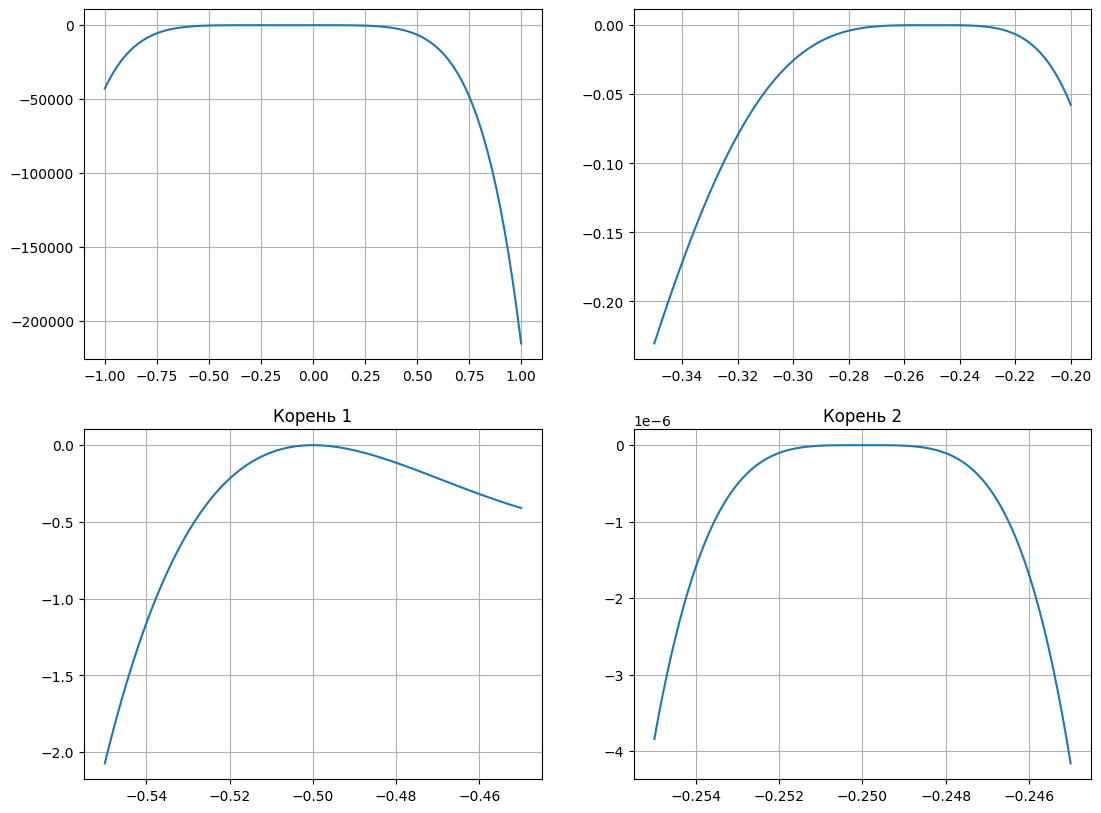

In [13]:
X = np.linspace(-1, 1, 100)

#Визуально найдён корни для этих параметров
Y = function(X, a0=0.3, b0=0.6, c0=0.1, d0=0.7)


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13,10))

axs[0,0].plot(X, Y)
axs[0,0].grid()


X = np.linspace(-0.35, -0.2, 100)
Y = function(X)
axs[0,1].plot(X, Y)
axs[0,1].grid()

X = np.linspace(-0.55, -0.45, 100)
Y = function(X)
axs[1,0].plot(X, Y)
axs[1,0].grid()
axs[1,0].set_title('Корень 1')

X = np.linspace(-0.255, -0.245, 100)
Y = function(X)
axs[1,1].plot(X, Y)
axs[1,1].grid()
axs[1,1].set_title('Корень 2')

__Теорёма__

Если $f(x) \in C([a,b]) $ и $f(a)*f(b) < 0$, то $ \exists x_0 : f(x_o) = 0 $

-0.049996948242187506

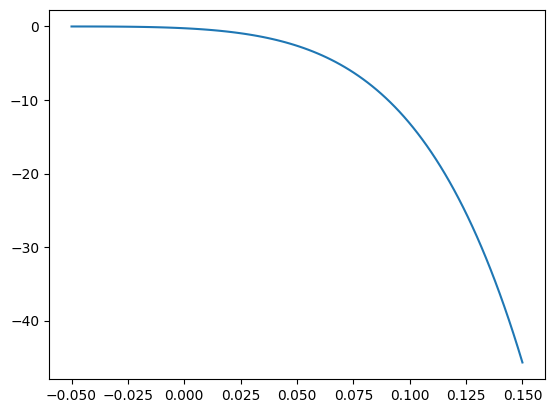

In [14]:
def dichotomy(func, e = 10**(-5), draw=False, **kwargs): #__version__ = 4.0 
    '''
    Функция численно находит корень уравнения методом дихотомии
    '''
    __version__ = 4.0

    #Убедимся, что корень вообще есть на отрезке
    #assert func(A, **kwargs) * func(B, **kwargs) < 0, 'корня на отрезке нет'

    
    #У нас по условию х должен лежать в интервале
    left_border = np.maximum(
                             - kwargs['c0'] / 2,
                             - kwargs['d0'] / 4
                            )
    right_border = np.minimum(
                             kwargs['a0'],
                             kwargs['b0'] / 4
                             )

    if draw == True:
        X = np.linspace(left_border, right_border, 100)
        Y = function(X, **kwargs)
        plt.plot(X, Y)
    
    B = right_border
    A = left_border

    while (B - A) > e:
        middle_point = (B + A) / 2 #Точка в середине 

        if func(A, **kwargs)*func(middle_point, **kwargs) < 0:
            B = middle_point
        else:
            A = middle_point
        
    return (A+B) / 2

dichotomy(function, draw=True, a0=0.3, b0=0.6, c0=0.1, d0=0.7)

In [15]:
function(-0.049996948242187506, a0=0.3, b0=0.6, c0=0.1, d0=0.7)

-2.328533818536711e-10

In [16]:
#Готовые численные методы решения уравнений
from scipy.optimize import fsolve

# Использование функции fsolve для решения уравнения
#Задаём функцию и начальное приближение

solution1 = fsolve(function, 0)
solution2 = fsolve(function, -2) 

print(solution1, solution2)

fsolve(function, 0.05, args=(400, 1, 1, 1, 1, 100))

[-0.25] [-0.5]


array([-0.25])

In [17]:
print(function(-0.25))
print(function(-0.5))

#Наше решение
function(-0.04999732971191406)

1.1408300655531156e-41
6.468506471686165e-41


-33.1797656826832

In [18]:
from sympy import symbols, Eq, solve

x = symbols('x')

# Уравнение
equation = Eq(function(x), 0)

# Решение уравнения
solutions = solve(equation, x)

# Вывод численных значений решений
#numeric_solutions = [float(sol.evalf()) for sol in solutions]
#print(numeric_solutions)  # Вывод решений
solutions

[-0.500000000000000,
 -0.500000000000000,
 -0.250000000006498,
 -0.249999999993502,
 -0.25 - 6.49770882749059e-12*I,
 -0.25 + 6.49770882749059e-12*I]

In [19]:
#Для объяснения концепции **kwargs

def function1(x, a1 = 1, b1 = 2):
    print(f'a1 = {a1}')
    print(f'b1 = {b1}')
    return 2 * x

def METAfunc(y, T = 50, P = 100, **kwargs):
    print(function1(T, **kwargs))
    print('Something new')
    print(kwargs['a1']) #Обращение как к словарю
    return True

METAfunc(19, a1=100, b1=20)

a1 = 100
b1 = 20
100
Something new
100


True

-0.049994621866268504
-7.232325159780906e-10


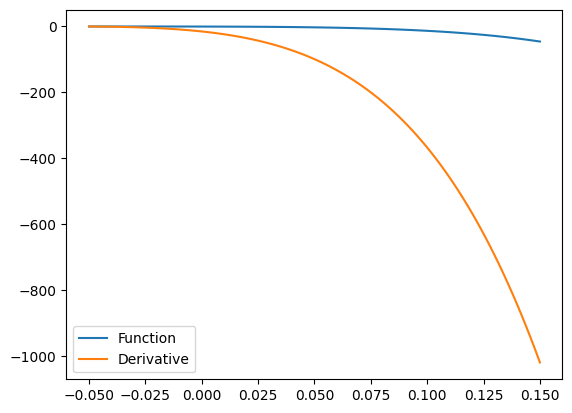

In [20]:
#Попробуем написать функцию, которая будет решать методом Ньютона

def function(x, T = 400, a0 = 1, b0 = 1, c0 = 1, d0 = 1, P = 100):
    '''
    Уравнение, которое мы будем численно решать
    Должно быть задано в виде f(X) = 0
    '''

    K = Kp(T) #Вычисляем константу

    return K * (a0 - x) * (b0 - 4*x)**4 * (a0 + b0 + c0 + d0 + x) - P * (c0 + 2 * x)**2 * (d0 + 4 * x)**4


def function_diff(x, T = 400, a0 = 1, b0 = 1, c0 = 1, d0 = 1, P = 100):
    '''
    Производная нашей функции
    '''
    K = Kp(T)

    return K*(a0 - x)*(b0 - 4*x)**4 - 16*K*(a0 - x)*(b0 - 4*x)**3*(a0 + b0 + c0 + d0 + x) - K*(b0 - 4*x)**4*(a0 + b0 + c0 + d0 + x) - 16*P*(c0 + 2*x)**2*(d0 + 4*x)**3 - P*(4*c0 + 8*x)*(d0 + 4*x)**4

def Neuton(eps = 10**(-9), draw=False, **kwargs):
    '''
    Решение методом Ньютона
    '''

    #Наши условия
    left_border = np.maximum(
                             - kwargs['c0'] / 2,
                             - kwargs['d0'] / 4
                            )
    right_border = np.minimum(
                             kwargs['a0'],
                             kwargs['b0'] / 4
                             ) 
    
    #Выберем начальную точку в середине нашего интервала
    x0 = (left_border + right_border) / 2

    
    y = function(x0, **kwargs)
    y_diff = function_diff(x0, **kwargs)

    while np.abs(y) > eps:

        x0 = x0 - y / y_diff
        y = function(x0, **kwargs)
        y_diff = function_diff(x0, **kwargs)
    
    #print(f'from {left_border} to {right_border}')
    #print(right_border)

    if draw == True:
        X = np.linspace(left_border, right_border, 100)
        Y = function(X, **kwargs)
        Y1 = function_diff(X, **kwargs)
        Y2 = FUNC(X, **kwargs)
        plt.plot(X, Y, label='Function')
        plt.plot(X, Y1, label='Derivative')
        #plt.plot(X, Y2, label='2 - Derivative')
        plt.legend()

    return x0

print(Neuton(a0=0.3, b0=0.6, c0=0.1, d0=0.7, draw=True))

#Посмотрим на значение функции
print(function(-0.049994621866268504, a0=0.3, b0=0.6, c0=0.1, d0=0.7))
#print(function(-0.25, a0=0.3, b0=0.6, c0=0.1, d0=0.7))

$$ S_2 + 4CO_2 =  2SO_2 + 4CO $$

In [21]:
# Сделаем табличку
answer = pd.DataFrame(
                      {
                        'S2' : [0, 0, 0],
                        'CO2' : [0, 0, 0],
                        'SO2' : [0, 0, 0],
                        'CO' : [0, 0, 0]
                      }, index=['Исх. состав', 'Равнов. состав', 'Парц. давления']
                      )

answer

,S2,CO2,SO2,CO
Исх. состав,0,0,0,0
Равнов. состав,0,0,0,0
Парц. давления,0,0,0,0


In [22]:
answer.loc['Исх. состав'] = [1,2,3,4]

answer

,S2,CO2,SO2,CO
Исх. состав,1,2,3,4
Равнов. состав,0,0,0,0
Парц. давления,0,0,0,0


In [23]:
tabel1

,Вещество,Начальное количетсво,Прореагировало,Равновесное количество,Парциальное давление
S2,S2,a,-x,a - x,P * (a-x) / (a+b+c+d + x)
CO2,CO2,b,-4x,b - 4x,P * (b-4x) / (a+b+c+d + x)
SO2,SO2,c,2x,c + 2x,P * (c+2x) / (a+b+c+d + x)
CO,CO,d,4x,d + 4x,P * (d+4x) / (a+b+c+d + x)


In [24]:
#Здесь вводим с клавиатуры количества веществ 
N_S2 = 0.3
N_CO2 = 0.6
N_SO2 = 0.1 
N_CO = 0.7
T1 = 400 #Температура в Кельвинах
P1 = 100 #Давление в атмосферах

answer.iloc[0] = [N_S2, N_CO2, N_SO2, N_CO]

#Находим х
W = Neuton(a0 = N_S2, b0 = N_CO2, c0=N_SO2, d0=N_CO, T=T1, P=P1)

answer.iloc[1] = [N_S2 - W,
                  N_CO2 - 4 * W,
                  N_SO2 + 2*W,
                  N_CO + 4 *W]


answer.iloc[2] = answer.iloc[1] * P1 / (sum([N_S2, N_CO2, N_SO2, N_CO]) + W)

answer

,S2,CO2,SO2,CO
Исх. состав,0.300000,0.600000,0.100000,0.700000
Равнов. состав,0.349995,0.799978,0.000011,0.500022
Парц. давления,21.211726,48.483387,0.000652,30.304235


In [25]:
print(function(-0.049994621866268504, a0=0.3, b0=0.6, c0=0.1, d0=0.7))
print(function(-0.25, a0=0.3, b0=0.6, c0=0.1, d0=0.7))

-7.232325159780906e-10
-0.1296000000000001
